# Análisis exploratorio de ventas

Notebook pensado para explorar la evolución de las ventas mes a mes, combinando código, texto y visualizaciones minimalistas.

## 1. Importaciones

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from pathlib import Path

## 2. Cargar datos

In [39]:
base_path = Path('../data/raw')

clientes = pd.read_excel(base_path / 'clientes.xlsx')
productos = pd.read_excel(base_path / 'productos.xlsx')
ventas = pd.read_excel(base_path / 'ventas.xlsx', parse_dates=['fecha'])
detalle_ventas = pd.read_excel(base_path / 'detalle_ventas.xlsx')

print("Clientes:", clientes.shape)
print("Productos:", productos.shape)
print("Ventas:", ventas.shape)
print("Detalle Ventas:", detalle_ventas.shape)

detalle_por_venta = detalle_ventas.groupby('id_venta', as_index=False)['importe'].sum()
ventas_importe = ventas.merge(detalle_por_venta, on='id_venta', how='left')
ventas_importe['importe'] = ventas_importe['importe'].fillna(0)
ventas_importe = ventas_importe.sort_values('fecha').set_index('fecha')

ventas_importe.head()

Clientes: (100, 5)
Productos: (100, 4)
Ventas: (120, 6)
Detalle Ventas: (343, 6)


,id_venta,id_cliente,nombre_cliente,email,medio_pago,importe
fecha,,,,,,
2024-01-02,84,72,Camila Rodriguez,camila.rodriguez@mail.com,efectivo,26294
2024-01-04,55,100,Agustina Lopez,agustina.lopez@mail.com,qr,1876
2024-01-06,69,42,Tomas Flores,tomas.flores@mail.com,qr,26003
2024-01-06,8,66,Tomas Herrera,tomas.herrera@mail.com,transferencia,35516
2024-01-08,90,46,Agustina Martinez,agustina.martinez@mail.com,qr,18020


### 2.1 Vista general de las tablas

Revisión rápida de las principales fuentes para validar tipos de datos, ejemplos y consistencia básica.

In [40]:
# Parte 1.1 Ver info y describe los datos
for name, df in {
    'clientes': clientes,
    'productos': productos,
    'ventas': ventas,
    'detalle_ventas': detalle_ventas,
}.items():
    print(f"===== {name.upper()} =====")
    display(df.head())
    print(df.info(), "\n")

===== CLIENTES =====


,id_cliente,nombre_cliente,email,ciudad,fecha_alta
0,1,Mariana Lopez,mariana.lopez@mail.com,Carlos Paz,2023-01-01
1,2,Nicolas Rojas,nicolas.rojas@mail.com,Carlos Paz,2023-01-02
2,3,Hernan Martinez,hernan.martinez@mail.com,Rio Cuarto,2023-01-03
3,4,Uma Martinez,uma.martinez@mail.com,Carlos Paz,2023-01-04
4,5,Agustina Flores,agustina.flores@mail.com,Cordoba,2023-01-05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_cliente      100 non-null    int64         
 1   nombre_cliente  100 non-null    object        
 2   email           100 non-null    object        
 3   ciudad          100 non-null    object        
 4   fecha_alta      100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 4.0+ KB
None 

===== PRODUCTOS =====


,id_producto,nombre_producto,categoria,precio_unitario
0,1,Coca Cola 1.5L,Alimentos,2347
1,2,Pepsi 1.5L,Limpieza,4973
2,3,Sprite 1.5L,Alimentos,4964
3,4,Fanta Naranja 1.5L,Limpieza,2033
4,5,Agua Mineral 500ml,Alimentos,4777


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_producto      100 non-null    int64 
 1   nombre_producto  100 non-null    object
 2   categoria        100 non-null    object
 3   precio_unitario  100 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.3+ KB
None 

===== VENTAS =====


,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr
2,3,2024-01-13,20,Tomas Acosta,tomas.acosta@mail.com,tarjeta
3,4,2024-02-27,36,Martina Molina,martina.molina@mail.com,transferencia
4,5,2024-06-11,56,Bruno Diaz,bruno.diaz@mail.com,tarjeta


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_venta        120 non-null    int64         
 1   fecha           120 non-null    datetime64[ns]
 2   id_cliente      120 non-null    int64         
 3   nombre_cliente  120 non-null    object        
 4   email           120 non-null    object        
 5   medio_pago      120 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 5.8+ KB
None 

===== DETALLE_VENTAS =====


,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe
0,1,90,Toallas Húmedas x50,1,2902,2902
1,2,82,Aceitunas Negras 200g,5,2394,11970
2,2,39,Helado Vainilla 1L,5,469,2345
3,2,70,Fernet 750ml,2,4061,8122
4,2,22,Medialunas de Manteca,1,2069,2069


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_venta         343 non-null    int64 
 1   id_producto      343 non-null    int64 
 2   nombre_producto  343 non-null    object
 3   cantidad         343 non-null    int64 
 4   precio_unitario  343 non-null    int64 
 5   importe          343 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 16.2+ KB
None 



### 2.2 Normalización y codificación de ciudades
Aplicamos el diccionario de ciudades definido por el sistema para facilitar futuros modelos o agrupaciones.

In [41]:
ciudad_map = {
    'Cordoba': 0,
    'Carlos Paz': 1,
    'Rio Cuarto': 2,
    'Santa Fe': 3,
    'Villa Maria': 4,
    'Alta Gracia': 5,
    'Mendiolaza': 6,
}

clientes['ciudad_codigo'] = clientes['ciudad'].map(ciudad_map)
if clientes['ciudad_codigo'].isna().any():
    print("⚠️ Ciudades sin codificar:")
    display(clientes.loc[clientes['ciudad_codigo'].isna(), ['id_cliente', 'ciudad']])
clientes['ciudad_codigo'] = clientes['ciudad_codigo'].astype('Int64')

### 2.3 Vista unificada para análisis
Creamos una base de hechos que combina ventas, detalle, clientes y productos.

In [42]:
detalle_enriquecido = (
    detalle_ventas.drop(columns=['nombre_producto'], errors='ignore')
    .merge(
        productos[['id_producto', 'nombre_producto', 'categoria']],
        on='id_producto',
        how='left'
    )
)

base_unificada = (
    ventas.merge(
        clientes[['id_cliente', 'ciudad', 'ciudad_codigo']],
        on='id_cliente',
        how='left'
    )
    .merge(detalle_enriquecido, on='id_venta', how='left')
)

columnas_interes = [
    'id_venta', 'fecha', 'medio_pago',
    'id_cliente', 'nombre_cliente', 'email', 'ciudad', 'ciudad_codigo',
    'id_producto', 'nombre_producto', 'categoria',
    'cantidad', 'precio_unitario', 'importe'
]

base_unificada = base_unificada[columnas_interes]

print("Registros en base unificada:", base_unificada.shape)
base_unificada.head()

Registros en base unificada: (343, 14)


,id_venta,fecha,medio_pago,id_cliente,nombre_cliente,email,ciudad,ciudad_codigo,id_producto,nombre_producto,categoria,cantidad,precio_unitario,importe
0,1,2024-06-19,tarjeta,62,Guadalupe Romero,guadalupe.romero@mail.com,Carlos Paz,1,90,Toallas Húmedas x50,Limpieza,1,2902,2902
1,2,2024-03-17,qr,49,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2,82,Aceitunas Negras 200g,Limpieza,5,2394,11970
2,2,2024-03-17,qr,49,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2,39,Helado Vainilla 1L,Alimentos,5,469,2345
3,2,2024-03-17,qr,49,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2,70,Fernet 750ml,Limpieza,2,4061,8122
4,2,2024-03-17,qr,49,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2,22,Medialunas de Manteca,Limpieza,1,2069,2069


## 3. Análisis exploratorio de datos (EDA)

Preparamos una copia de la base unificada con columnas auxiliares para facilitar los perfiles y verificaciones.

In [43]:
df_eda = base_unificada.copy()

df_eda['anio'] = df_eda['fecha'].dt.year
sinfo = df_eda['fecha'].dt.strftime('%B')
df_eda['mes'] = sinfo

df_eda['dia_semana'] = df_eda['fecha'].dt.day_name()

df_eda.head()

,id_venta,fecha,medio_pago,id_cliente,nombre_cliente,email,ciudad,ciudad_codigo,id_producto,nombre_producto,categoria,cantidad,precio_unitario,importe,anio,mes,dia_semana
0,1,2024-06-19,tarjeta,62,Guadalupe Romero,guadalupe.romero@mail.com,Carlos Paz,1,90,Toallas Húmedas x50,Limpieza,1,2902,2902,2024,June,Wednesday
1,2,2024-03-17,qr,49,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2,82,Aceitunas Negras 200g,Limpieza,5,2394,11970,2024,March,Sunday
2,2,2024-03-17,qr,49,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2,39,Helado Vainilla 1L,Alimentos,5,469,2345,2024,March,Sunday
3,2,2024-03-17,qr,49,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2,70,Fernet 750ml,Limpieza,2,4061,8122,2024,March,Sunday
4,2,2024-03-17,qr,49,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2,22,Medialunas de Manteca,Limpieza,1,2069,2069,2024,March,Sunday


### 3.1 Perfil general del dataset

Revisamos la estructura y tipos de datos de la copia que usaremos para EDA.

In [44]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_venta         343 non-null    int64         
 1   fecha            343 non-null    datetime64[ns]
 2   medio_pago       343 non-null    object        
 3   id_cliente       343 non-null    int64         
 4   nombre_cliente   343 non-null    object        
 5   email            343 non-null    object        
 6   ciudad           343 non-null    object        
 7   ciudad_codigo    343 non-null    Int64         
 8   id_producto      343 non-null    int64         
 9   nombre_producto  343 non-null    object        
 10  categoria        343 non-null    object        
 11  cantidad         343 non-null    int64         
 12  precio_unitario  343 non-null    int64         
 13  importe          343 non-null    int64         
 14  anio             343 non-null    int32    

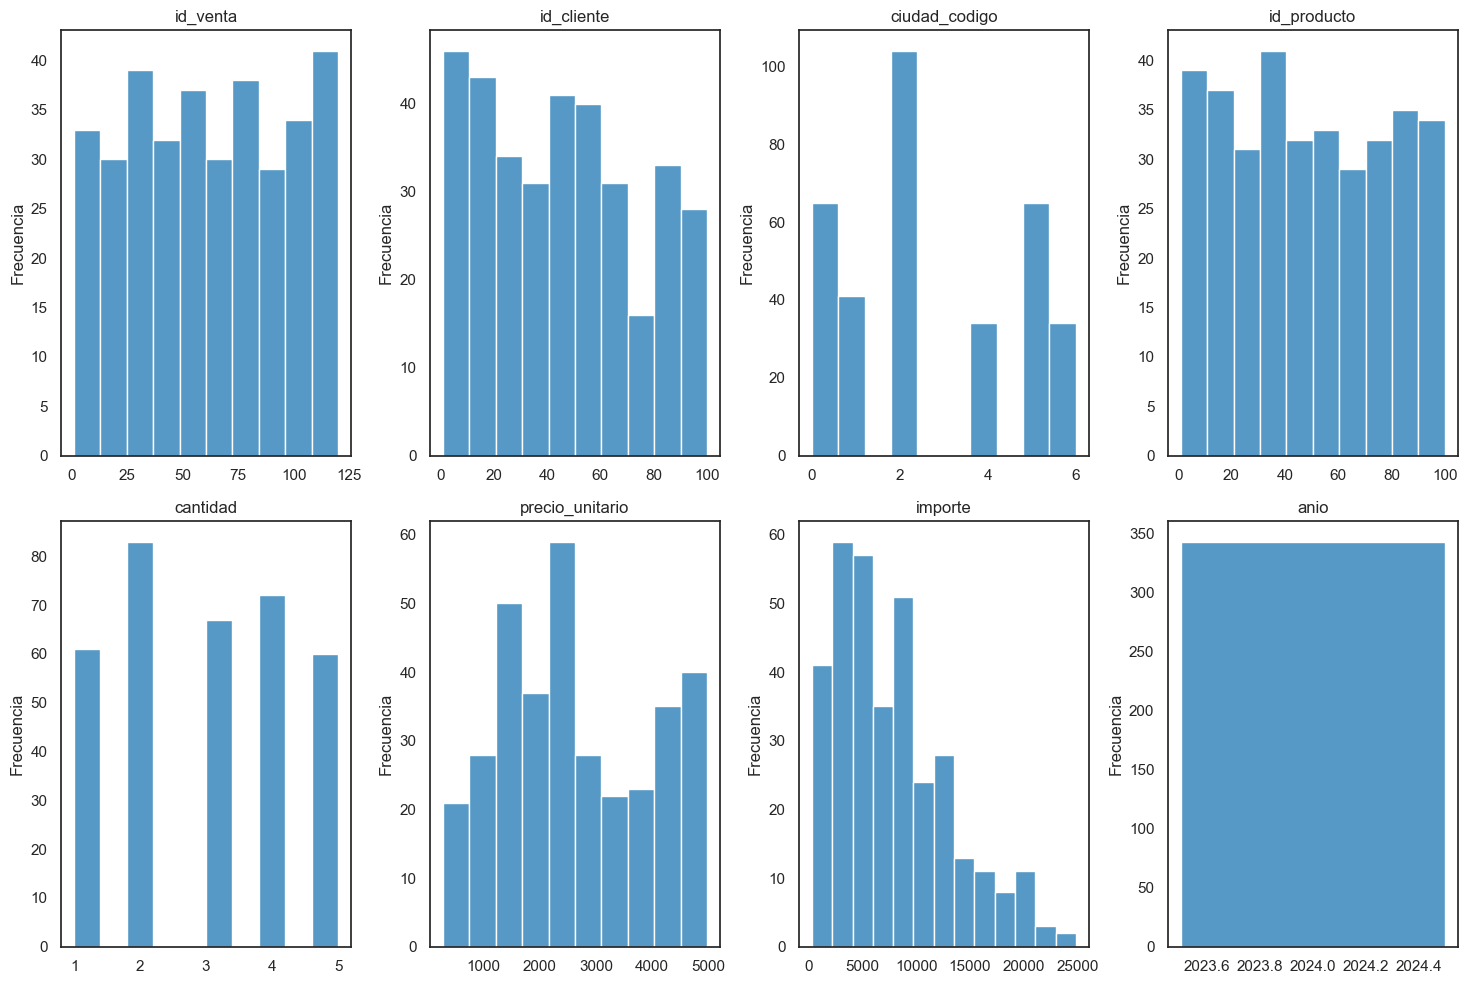

In [45]:
numeric_cols = df_eda.select_dtypes(include='number')
fig, axes = plt.subplots(
    nrows=2,
    ncols=int(np.ceil(len(numeric_cols.columns) / 2)),
    figsize=(15, 10),
    facecolor='white'
)
axes = axes.flatten()

for idx, col in enumerate(numeric_cols.columns):
    sns.histplot(df_eda[col], ax=axes[idx], kde=False, color='#1f77b4', edgecolor='white')
    axes[idx].set_title(col)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Frecuencia')

# Ocultamos ejes sobrantes si la cuadrícula es mayor al número de columnas
for ax in axes[len(numeric_cols.columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

### 3.3 Análisis bivariado

Contrastamos las principales variables numéricas para detectar relaciones lineales o patrones entre pares.

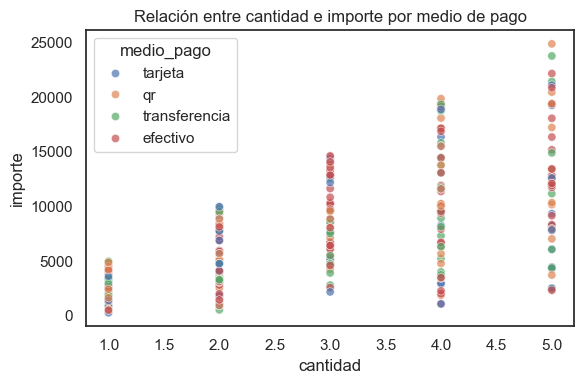

In [47]:
num_cols = ['cantidad', 'precio_unitario', 'importe']
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df_eda,
    x='cantidad',
    y='importe',
    hue='medio_pago',
    alpha=0.7
)
plt.title('Relación entre cantidad e importe por medio de pago')
plt.tight_layout()
plt.show()


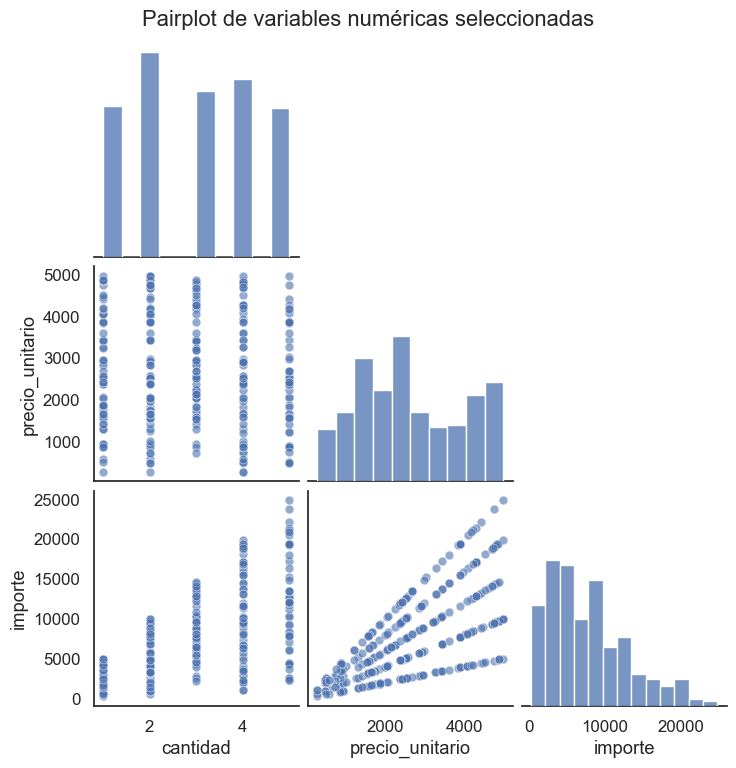

In [48]:
num_cols_pair = ['cantidad', 'precio_unitario', 'importe']
with sns.plotting_context("notebook", font_scale=1.1):
    g = sns.pairplot(
        df_eda[num_cols_pair],
        diag_kind='hist',
        corner=True,
        plot_kws={'alpha': 0.6, 's': 40}
    )
    g.fig.suptitle('Pairplot de variables numéricas seleccionadas', y=1.02)
plt.show()


### 3.4 Distribución de importes

Revisamos la dispersión y estadísticos descriptivos del importe de venta para identificar valores atípicos.

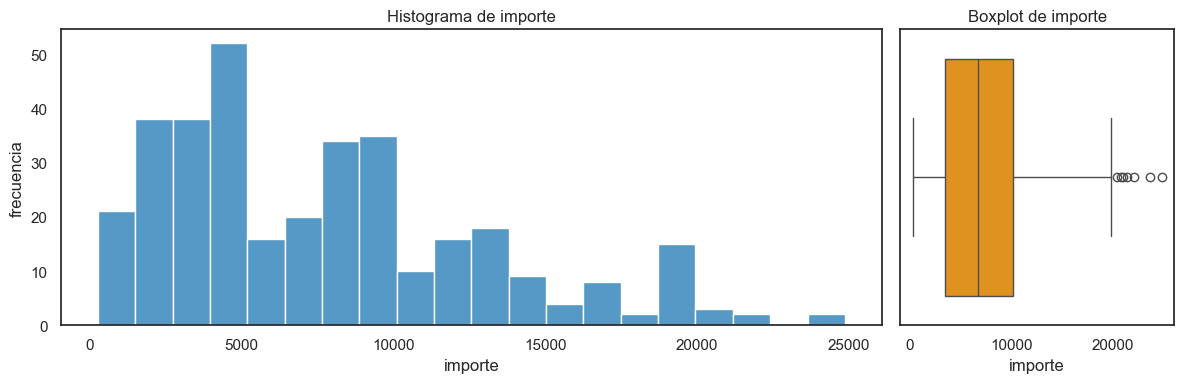

,count,mean,std,min,25%,50%,75%,max
importe,343.0,7730.078717,5265.543077,272.0,3489.0,6702.0,10231.5,24865.0


In [49]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [3, 1]})

sns.histplot(df_eda['importe'], bins=20, ax=axes[0], color='#1f77b4')
axes[0].set_title('Histograma de importe')
axes[0].set_xlabel('importe')
axes[0].set_ylabel('frecuencia')

sns.boxplot(x=df_eda['importe'], ax=axes[1], color='#ff9800')
axes[1].set_title('Boxplot de importe')
axes[1].set_xlabel('importe')

plt.tight_layout()
plt.show()

display(df_eda['importe'].describe().to_frame().T)

### 3.5 Matriz de correlación

Exploramos la relación lineal entre las variables numéricas principales del conjunto de datos.

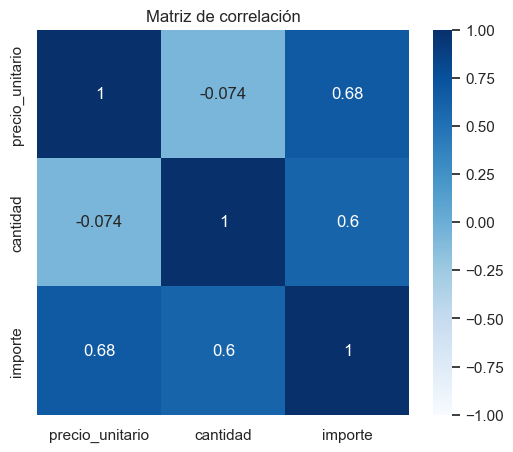

,precio_unitario,cantidad,importe
precio_unitario,1.000000,-0.074483,0.679298
cantidad,-0.074483,1.000000,0.599723
importe,0.679298,0.599723,1.000000


In [52]:
price_candidates = ['precio_unitario', 'precio_unitario_x', 'precio_unitario_y']
price_col = next((col for col in price_candidates if col in df_eda.columns), None)

if price_col is None:
    raise KeyError("No se encontró una columna de precio unitario en df_eda")

required_cols = [price_col, 'cantidad', 'importe']
missing_cols = [col for col in required_cols if col not in df_eda.columns]
if missing_cols:
    raise KeyError(f"Columnas faltantes para la correlación: {missing_cols}")

corr = df_eda[required_cols].corr()
rename_map = {price_col: 'precio_unitario'}
corr = corr.rename(index=rename_map, columns=rename_map)

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Matriz de correlación')
plt.show()

corr